## Telco Customer Churn Analysis with Machine Learning Techniques


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.svm import SVC
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from ggplot import *

In [4]:
telcomdata = pd.read_csv("Telecom-Usage-Details.csv")
telcomdata.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


### Converting datatypes

In [5]:
telcomdata['TotalCharges']=pd.to_numeric(telcomdata['TotalCharges'],errors="coerce")
telcomdata.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [6]:
telcomdata.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Data has 11 missing values. Hence, we discard them before we proceed with our EDA.

In [7]:
telcomdata = telcomdata.dropna()

### Explore Data - descriptive analytics.

In [8]:
print(list(telcomdata.columns))
print("-"*40)
print(telcomdata.shape)

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
----------------------------------------
(7032, 21)


So our data consisted of 7032 customers (observations) and 21 variables (features).

In [9]:
round(telcomdata[['tenure','MonthlyCharges','TotalCharges']].describe(),1)

,tenure,MonthlyCharges,TotalCharges
count,7032.0,7032.0,7032.0
mean,32.4,64.8,2283.3
std,24.5,30.1,2266.8
min,1.0,18.2,18.8
25%,9.0,35.6,401.4
50%,29.0,70.4,1397.5
75%,55.0,89.9,3794.7
max,72.0,118.8,8684.8


Average time that a customer stay with the telco is almost more than 2 years. 

The Average of Monthly Charges is 64.8 & the Average if Total Charges is 2283.3.

### Data visuallisation.

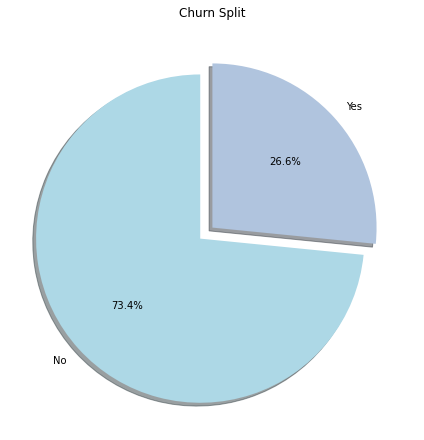

In [10]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

labels, values = zip(*Counter(telcomdata["Churn"]).items())
colors = ['lightblue', 'lightsteelblue']
piechart_df = (pd.DataFrame(list(values),list(labels)))
piechart_df = piechart_df.reset_index()

fig = plt.figure(figsize=[6, 6])

plt.pie(piechart_df[0],labels=piechart_df["index"],startangle=90,explode=(0.1,0),autopct="%1.1f%%", shadow=True, colors=colors)
plt.tight_layout()
plt.title("Churn Split")
plt.show()

As we can see, from our data of around 7000 entries, only **26.6%** of the customers have churned out. The other **73.4%** have stayed with the company.

We then plot our data across **Tenure** & **Churn**.

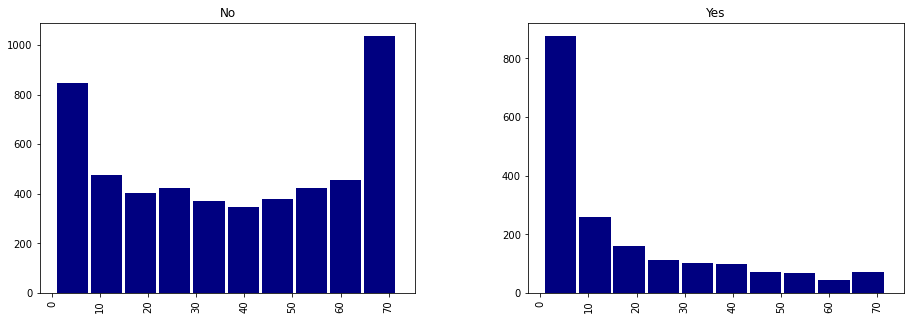

In [11]:
fig=telcomdata['tenure'].hist(by=telcomdata['Churn'],figsize=(15,5),width=6.5, color='navy' )
plt.show()

Our data consist of only 3 features which are continuous. The rest of our variables are categorical. For any kind of analysis, we need to encode  the categorical data.

We do this using the Label Encoder package.

The feature **customerID** is unique & is not useful to us. Hence, we do not consider it in our analysis.

In [33]:
from sklearn.cluster import KMeans

In [43]:
churn_cust = telcomdata[['tenure','TotalCharges']][telcomdata.Churn == 1]
churn_cust.head()

,tenure,TotalCharges
2,1,536
4,1,674
5,7,2173
8,27,4384
13,48,5421


In [54]:
kmeans = KMeans(n_clusters = 3, random_state = 42).fit(churn_cust)

In [55]:
set(kmeans.labels_)

{0, 1, 2}

In [56]:
churn_cust['label'] = kmeans.labels_
churn_cust.head()

,tenure,TotalCharges,label
2,1,536,0
4,1,674,0
5,7,2173,2
8,27,4384,1
13,48,5421,1


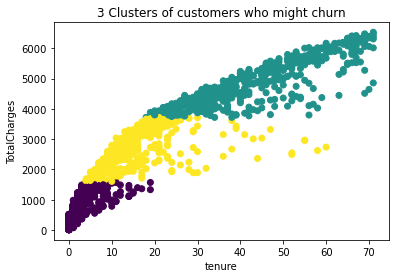

In [58]:
import matplotlib.pyplot as plt

plt.scatter(churn_cust['tenure'], churn_cust['TotalCharges'], c=churn_cust['label'])
plt.xlabel('tenure')
plt.ylabel('TotalCharges')
plt.title('3 Clusters of customers who might churn')
plt.show()



In [71]:
### Customers with low Total charges and low tenure: Could have been a temporary connection for them or people looking for very minimal service who found a service provider offering even lower charges for basic services and churned quickly despite low Total charges
### Customers with high Total charges and low tenure: The heaviest concentration of churned users. The most common churned users who were possibly unhappy with the prices and stayed for a little while before quickly leaving the service provider for better , cheaper options.
### Customers with high Total charges and high tenure: The most interesting group of churned users. They might have stayed initially despite high prices becuase they either thought the service was worth the price or simply due to lack of better alternatives and churned after a while in contrast with most other churned users who churned pretty quickly in their tenure. 

In [12]:
#transforming the data

telcomdata = telcomdata.apply(LabelEncoder().fit_transform)
telcomdata = telcomdata.drop('customerID',axis=1)
telcomdata.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0,0,1,0,0,2,0,0,0,0,0,1,2,142,74,0
1,1,0,0,0,33,1,0,0,2,0,2,0,0,0,1,0,3,497,3624,0
2,1,0,0,0,1,1,0,0,2,2,0,0,0,0,0,1,3,435,536,1


In order to have a look at the correlation between our variables, we decided to look at the correlation plot using the Pearson Method.

We have a lot of variables in our dataset. This isn't really a good way to look at the correlation matrix. So, we plotted the Heatmap. 

In [13]:
telcomdata.corr(method="pearson")

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.006908,-0.002236,-0.014899,-0.011920,0.001348,-0.006695,-0.005624,-0.008920,0.000095,-0.011902,0.016942,-0.013929,-0.000579,-0.008545
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.146287,-0.032160,-0.127937,-0.013355,-0.021124,-0.151007,0.031019,0.047088,-0.141820,0.156258,-0.038158,0.219210,0.107202,0.150541
Partner,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142717,0.000513,0.150610,0.153045,0.165614,0.126488,0.136679,0.129907,0.294094,-0.013957,-0.156232,0.107482,0.342319,-0.149982
Dependents,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024975,0.044030,0.151198,0.090231,0.079723,0.132530,0.046214,0.022088,0.240556,-0.110131,-0.041989,-0.105948,0.081626,-0.163128
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.343673,-0.029835,0.327283,0.372434,0.372669,0.324729,0.290572,0.296785,0.676734,0.004823,-0.370087,0.267182,0.871680,-0.354049
PhoneService,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,-0.020504,0.387266,-0.014163,0.024040,0.004718,-0.018136,0.056393,0.043025,0.003019,0.016696,-0.005499,0.271652,0.085934,0.011691
MultipleLines,-0.006908,0.146287,0.142717,-0.024975,0.343673,-0.020504,1.000000,-0.108849,0.007306,0.117276,0.122614,0.010941,0.175403,0.181705,0.111029,0.165306,-0.176598,0.445006,0.463532,0.038043
InternetService,-0.002236,-0.032160,0.000513,0.044030,-0.029835,0.387266,-0.108849,1.000000,-0.028003,0.036735,0.045558,-0.025626,0.108190,0.097967,0.099579,-0.138166,0.084504,-0.243738,-0.209762,-0.047097
OnlineSecurity,-0.014899,-0.127937,0.150610,0.151198,0.327283,-0.014163,0.007306,-0.028003,1.000000,0.184942,0.175789,0.284875,0.044399,0.056313,0.373980,-0.157723,-0.096593,-0.044322,0.246996,-0.289050
OnlineBackup,-0.011920,-0.013355,0.153045,0.090231,0.372434,0.024040,0.117276,0.036735,0.184942,1.000000,0.187646,0.195581,0.147085,0.137083,0.280617,-0.012697,-0.125534,0.141519,0.352453,-0.195290


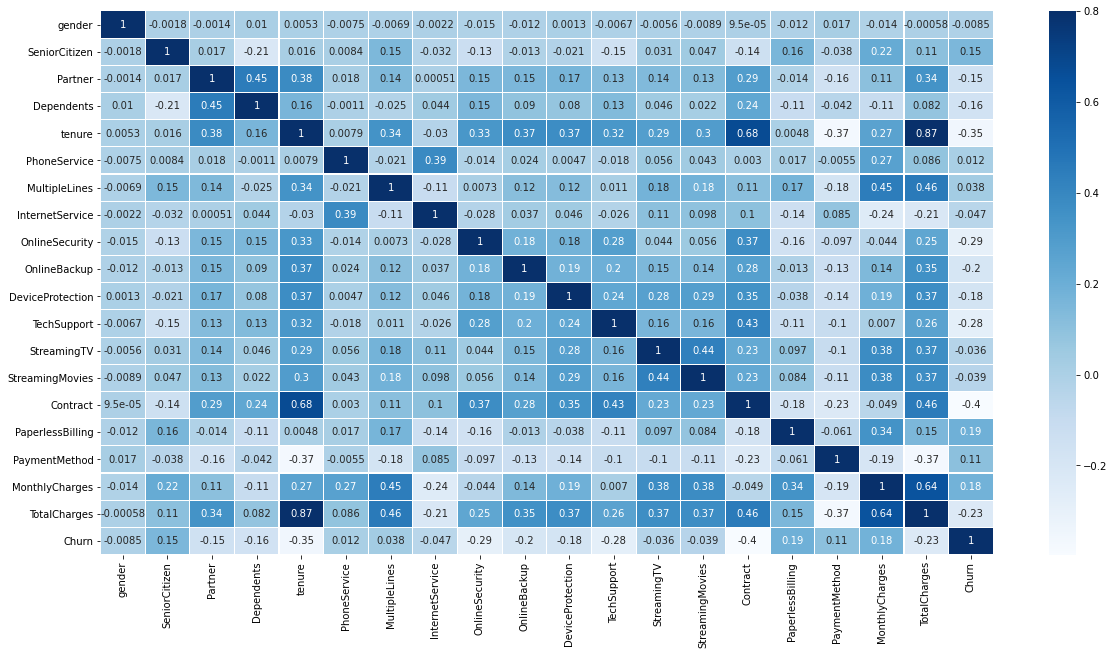

In [14]:
# Correlation Plot
corrmat = telcomdata.corr()

#Set uo the matplolib figure
f, ax = plt.subplots(figsize=(20, 10))

#Draw the heatmap using seaborn
colormap = plt.cm.Blues
sns.heatmap(corrmat, linewidths=0.1, cmap = colormap, linecolor = 'White', vmax=0.8, annot=True)


### Data Preprocessing, Feature Selection & Feature Importance


In [15]:
#Splitting the data into features & target

X = telcomdata.iloc[:,:-2]
y = telcomdata[["Churn"]]


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state=0,stratify=y)
#scaling the data

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)



   * Feature Importance using Random Forest Classifier

   * Recursive Feature Elimination using Logistic Regression Classifier


In [17]:
rfc = RandomForestClassifier(random_state=0,n_estimators=1000)
rfc.fit(X_train_std,y_train)
importances = rfc.feature_importances_

f_importances = pd.Series(importances, telcomdata.columns[:-2])
f_importances.sort_values(ascending=False, inplace=True)
f_importances

MonthlyCharges      0.233021
tenure              0.225098
Contract            0.087561
PaymentMethod       0.063334
TechSupport         0.047610
OnlineSecurity      0.047193
gender              0.033516
OnlineBackup        0.030724
PaperlessBilling    0.029269
Partner             0.027679
DeviceProtection    0.026863
MultipleLines       0.026073
InternetService     0.025465
SeniorCitizen       0.025406
Dependents          0.023294
StreamingMovies     0.021250
StreamingTV         0.020435
PhoneService        0.006208
dtype: float64

As we can see, the features that contribute most to the customer's decision to either stick or change are **MonthlyCharges** & **tenure**.


Optimal number of features : 16


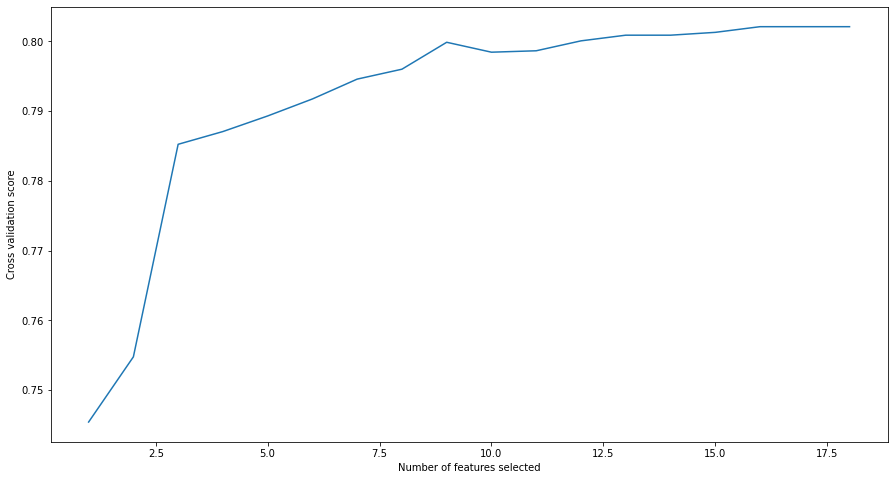

In [18]:
lr = LogisticRegression(penalty="l1",C=.1,random_state=0)

selector = RFECV(estimator=lr, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
selector.fit(X_train_std, y_train)

print("Optimal number of features : %d" % selector.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(15,8))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
plt.show()

The output of the RFE is surprising since it mentions that the optnmal number of variables are **16**. So we decided to include all the variables in our analysis & move ahead.

### Model Building & Comparison


   * Logistic Regression

   * Random Forest Classifier

   * Decision Tree Classifier


### Model 1 - Logistic Regression


In [19]:
lr = LogisticRegression(penalty="l1",C=.1,random_state=0)
lr.fit(X_train_std,y_train)

y_pred_lr = lr.predict(X_test_std)

train_acc_log = round((lr.score(X_train_std, y_train))*100,1)
test_acc_log = round((lr.score(X_test_std, y_test))*100,1)

print("Training accuracy: %s %%" % train_acc_log)
print('Test accuracy: %s %%' % test_acc_log)

Training accuracy: 80.5 %
Test accuracy: 80.7 %


In [20]:
from sklearn.metrics import roc_curve

preds = lr.predict_proba(X_test_std)[:,1]
fpr_lr, tpr_lr, thresholds = metrics.roc_curve(y_test, preds)
roc_data = pd.DataFrame(dict(fpr=fpr_lr,tpr=tpr_lr))
auc_lr = round(metrics.auc(fpr_lr,tpr_lr),2)

#ggplot(roc_data,aes(x="fpr",y="tpr"))+geom_line()+geom_abline(linetype='dashed')+geom_area(alpha=.2)+ggtitle("ROC Curve for Logistic Regression with AUC = %s" % str(auc_lr))

In [21]:
X_arr = X.values
y_arr = y.values.flatten()

from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics, model_selection

predicted = model_selection.cross_val_predict(LogisticRegression(), X_arr, y_arr, cv=10)

lr_cv_score = round(metrics.accuracy_score(y_arr, predicted)*100,1)

print("Logistic Regression score after using Cross Validation (k=10) is : %s %%"% lr_cv_score)

Logistic Regression score after using Cross Validation (k=10) is : 80.5 %


              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1549
           1       0.68      0.51      0.59       561

   micro avg       0.81      0.81      0.81      2110
   macro avg       0.76      0.71      0.73      2110
weighted avg       0.80      0.81      0.80      2110



Text(0.5, 1.0, 'Logistic Regression')

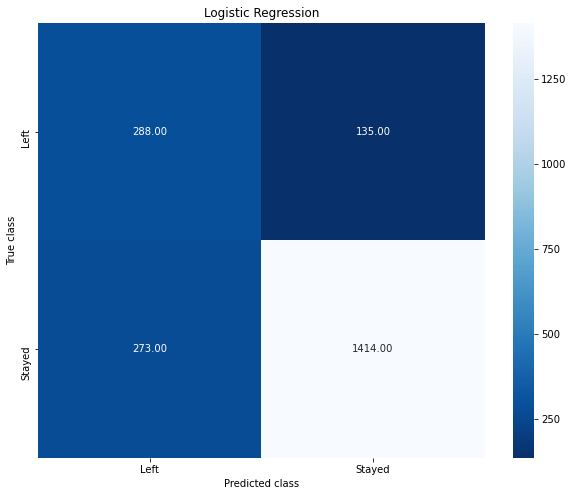

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lr))

##Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

logit_cm = metrics.confusion_matrix(y_pred_lr, y_test, [1,0])

plt.figure(figsize=(10,8))
sns.heatmap(logit_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] ,cmap = plt.cm.Blues_r)
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')

### Comment

Logistic Regression model accuracy is **80.5%**.

The ROC curve doesn't look that great either. However, the AUC (Area Under the curve) is **84%**.

### Model 2 -  Random Forest Classifier

In [24]:
rfc = RandomForestClassifier(random_state=0,n_estimators=1000,criterion="gini")

rfc.fit(X_train_std,y_train)

y_pred_rfc = rfc.predict(X_test_std)

train_acc_rfc = round((rfc.score(X_train_std, y_train))*100,1)
test_acc_rfc = round((rfc.score(X_test_std, y_test))*100,1)

print("Training accuracy: %s %%" % train_acc_rfc)
print('Test accuracy: %s %%' % test_acc_rfc)

Training accuracy: 99.7 %
Test accuracy: 79.0 %


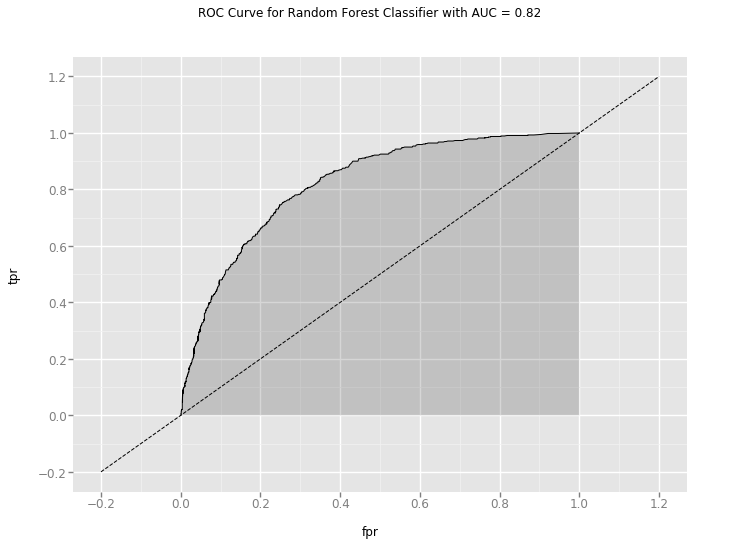

<ggplot: (98841088737)>

In [24]:
# from sklearn.metrics import roc_curve
# #!pip install ggplot
# from ggplot import *

preds = rfc.predict_proba(X_test_std)[:,1]
fpr_rfc, tpr_rfc, thresholds = metrics.roc_curve(y_test, preds)

roc_data = pd.DataFrame(dict(fpr=fpr_rfc,tpr=tpr_rfc))

auc_rfc = round(metrics.auc(fpr_rfc,tpr_rfc),2)

ggplot(roc_data,aes(x="fpr",y="tpr"))+geom_line()+geom_abline(linetype='dashed')+geom_area(alpha=.2)+ggtitle("ROC Curve for Random Forest Classifier with AUC = %s" % str(auc_rfc))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1549
           1       0.64      0.48      0.55       561

   micro avg       0.79      0.79      0.79      2110
   macro avg       0.73      0.69      0.70      2110
weighted avg       0.78      0.79      0.78      2110



Text(0.5, 1.0, 'RFC')

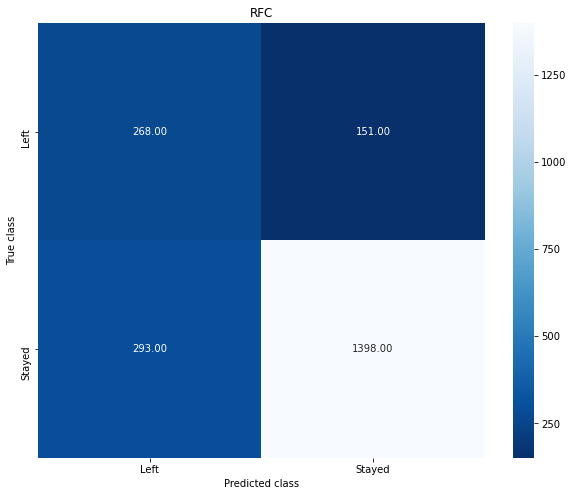

In [25]:
print(classification_report(y_test, y_pred_rfc))

##Confusion matrix

rfc_cm = metrics.confusion_matrix(y_pred_rfc, y_test, [1,0])

plt.figure(figsize=(10,8))
sns.heatmap(rfc_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] ,cmap = plt.cm.Blues_r)
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('RFC')

### Comment


The model accuracy fell to **79%**. Obviously, the ROC didn't perform much better either (AUC = **82%**). 

It didn't make sense to run a Cross Validation on the RFC since each tree is constructed using a different bootstrap sample from the original data & the estimate of the test error sample is estimated internally, during the run. 


### Model 3 - Decision Tree Classifier

In [26]:
from sklearn import tree

dtc = tree.DecisionTreeClassifier(random_state=0)

dtc.fit(X_train_std,y_train)

y_pred_dtc = dtc.predict(X_test_std)

train_acc_dtc = round((dtc.score(X_train_std, y_train))*100,1)
test_acc_dtc = round((dtc.score(X_test_std, y_test))*100,1)

print("Training accuracy: %s %%" % train_acc_dtc)
print('Test accuracy: %s %%' % test_acc_dtc)

Training accuracy: 99.7 %
Test accuracy: 71.6 %


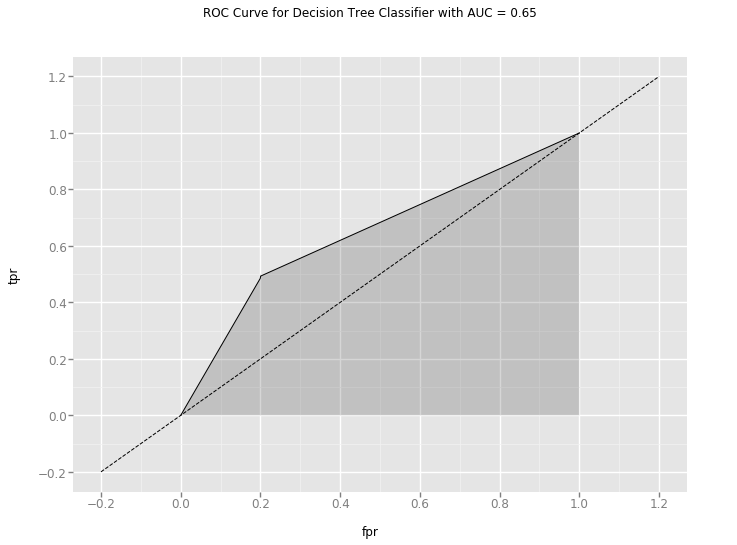

<ggplot: (98842423560)>

In [27]:
preds = dtc.predict_proba(X_test_std)[:,1]

fpr_dtc, tpr_dtc, thresholds = metrics.roc_curve(y_test, preds)

roc_data = pd.DataFrame(dict(fpr=fpr_dtc,tpr=tpr_dtc))

auc_dtc = round(metrics.auc(fpr_dtc,tpr_dtc),2)

ggplot(roc_data,aes(x="fpr",y="tpr"))+geom_line()+geom_abline(linetype='dashed')+geom_area(alpha=.2)+ggtitle("ROC Curve for Decision Tree Classifier with AUC = %s" % str(auc_dtc))

In [32]:
X_arr = X.values
y_arr = y.values.flatten()

predicted = model_selection.cross_val_score(tree.DecisionTreeClassifier(), X_arr, y_arr, cv=10)

dtc_cv_score = round(np.mean(predicted)*100,1)

print("Decision Tree Classifier score after using Cross Validation (k=10) is : %s %%" % dtc_cv_score)

             precision    recall  f1-score   support

          0       0.81      0.80      0.81      1549
          1       0.47      0.48      0.48       561

avg / total       0.72      0.72      0.72      2110



Text(0.5,1,'Decision Tree Classifier')

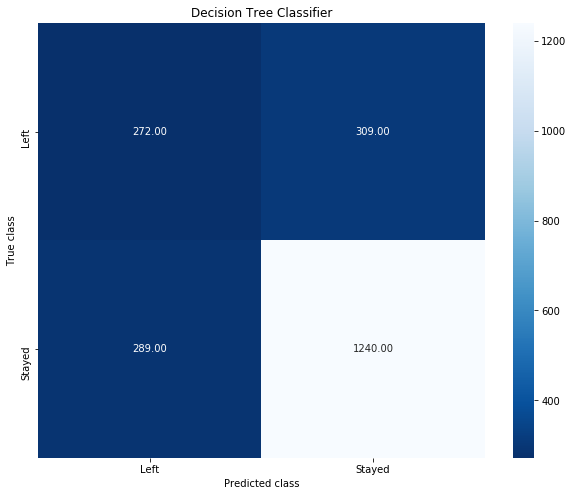

In [29]:
print(classification_report(y_test, y_pred_dtc))

##Confusion matrix

dtc_cm = metrics.confusion_matrix(y_pred_dtc, y_test, [1,0])

plt.figure(figsize=(10,8))
sns.heatmap(dtc_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"],cmap = plt.cm.Blues_r)
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Decision Tree Classifier')

### Comment

Our Decision Tree Classifier is a bit disapointing too. Test accuracy is only **71%** and the 10 fold Cross-Validation figure is similar (**72%**). 

### Model Comparison

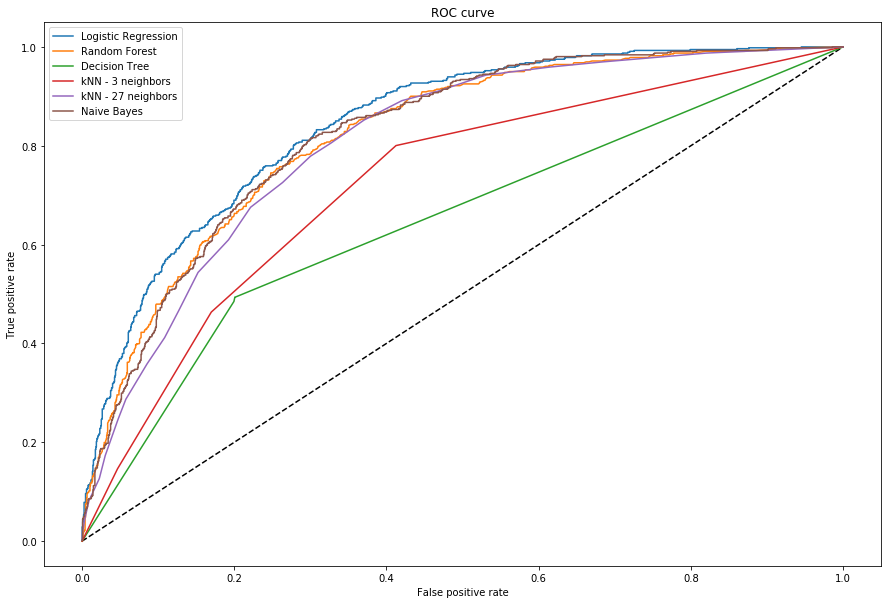

In [43]:
plt.figure(figsize=(15, 10))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_rfc, tpr_rfc, label='Random Forest')
plt.plot(fpr_dtc, tpr_dtc, label='Decision Tree')
plt.plot(fpr_knn, tpr_knn, label='kNN - 3 neighbors')
plt.plot(fpr_knn_opt, tpr_knn_opt, label='kNN - 27 neighbors')
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

### overall comment

As we can see, the model with the best ROC curve is the Logistic Regression. Random Forest is the second place. The Decision Model looks to be our worst model.

Our observations from the AUC concur with the test data scores across all the models, as shown below. 
